# 00- 一个完整的 Pandas 小教程


## 1、简介

### 1.1、与 NumPy 比较

我们之前介绍了 NumPy ，那么 NumPy 和 Pandas 之间有什么不同呢？

如果用 Python 的列表和字典来做比较，可以说 NumPy 是列表形式的，没有数值标签，而 Pandas 就是字典形式的。 Pandas 是基于 NumPy 构建的，让 NumPy 为中心的应用变得更加简单。

要使用 pandas ，首先需要了解它的最主要的两个数据结构：Series 和 DataFrame 。

### 1.2、Series

我们首先导入库，然后我们开始。

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 创建一个 Series
s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


Series 的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引，于是系统会自动创建一个 0 到 N-1（N 为长度）的整数型索引。

### 1.3、DataFrame

DataFrame 是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame 既有行索引也有列索引， 它可以被看做由 Series 组成的大字典。

In [3]:
dates = pd.date_range('20160101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])

print(df)

                   a         b         c         d
2016-01-01  0.364404  0.445680 -2.743672  0.040571
2016-01-02  0.972129 -0.034431  0.276310  0.884738
2016-01-03  0.321671 -1.504864 -0.568163  0.042450
2016-01-04  0.021835  1.748224 -1.684630  0.442470
2016-01-05  1.342166 -1.009416 -1.086918 -0.919168
2016-01-06 -0.034497  1.687844  0.354963  0.620586


就像上面这样，我们自己设置了索引（dates），将这些索引作为我们后面的数据的索引。

我们可以根据每一个不同的索引来挑选数据，比如挑选 b 的元素：

In [4]:
print(df['b'])

2016-01-01    0.445680
2016-01-02   -0.034431
2016-01-03   -1.504864
2016-01-04    1.748224
2016-01-05   -1.009416
2016-01-06    1.687844
Freq: D, Name: b, dtype: float64


### 1.4、DataFrame 的一些简单使用小技巧

我们再创建一组没有给定行标签和列标签的数据 df1 ：

In [5]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


这样，他就会采取默认的从 0 开始 index，还有一种生成 df 的方法，如下 df2 ：

In [6]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                    
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


这种方法能对每一列的数据进行特殊对待，如果想要查看数据中的类型，我们可以用 dtype 这个属性：

In [7]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


如果想看对应列的序号：

In [8]:
print(df2.index)

Int64Index([0, 1, 2, 3], dtype='int64')


同样，每种数据的名称也能看到：

In [9]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


如果只想看所有 df2 的值：

In [10]:
print(df2.values)

"""
array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)
"""

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


"\narray([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],\n       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],\n       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],\n       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)\n"

想知道数据的总结，可以用 describe() ：

In [11]:
df2.describe()

"""
         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0
"""

'\n         A    C    D\ncount  4.0  4.0  4.0\nmean   1.0  1.0  3.0\nstd    0.0  0.0  0.0\nmin    1.0  1.0  3.0\n25%    1.0  1.0  3.0\n50%    1.0  1.0  3.0\n75%    1.0  1.0  3.0\nmax    1.0  1.0  3.0\n'

如果想翻转数据，使用 transpose ，与 NumPy 中类似：

In [12]:
print(df2.T)

"""                   
0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  

"""

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


'                   \n0                    1                    2  A                    1                    1                    1   \nB  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   \nC                    1                    1                    1   \nD                    3                    3                    3   \nE                 test                train                 test   \nF                  foo                  foo                  foo   \n\n                     3  \nA                    1  \nB  2013-01-02 00:00:00  \nC                    1  \nD                    3  \nE                train  \nF                  foo  \n\n'

如果想对数据的 index 进行排序并输出：

In [13]:
print(df2.sort_index(axis=1, ascending=False))

"""
     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0
"""

     F      E  D    C          B    A
0  foo   test  3  1.0 2013-01-02  1.0
1  foo  train  3  1.0 2013-01-02  1.0
2  foo   test  3  1.0 2013-01-02  1.0
3  foo  train  3  1.0 2013-01-02  1.0


'\n     F      E  D    C          B    A\n0  foo   test  3  1.0 2013-01-02  1.0\n1  foo  train  3  1.0 2013-01-02  1.0\n2  foo   test  3  1.0 2013-01-02  1.0\n3  foo  train  3  1.0 2013-01-02  1.0\n'

如果是对数据的 value 排序输出：

In [14]:
print(df2.sort_values(by='B'))

"""
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
"""

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


'\n     A          B    C  D      E    F\n0  1.0 2013-01-02  1.0  3   test  foo\n1  1.0 2013-01-02  1.0  3  train  foo\n2  1.0 2013-01-02  1.0  3   test  foo\n3  1.0 2013-01-02  1.0  3  train  foo\n'

## 2、Pandas 选择数据

上面我们已经介绍了一点利用 Pandas 来选择数据了，这一节我们详细介绍一下。

我们首先创建一个 6X4 的矩阵数据。

In [15]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

"""
             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
"""

'\n             A   B   C   D\n2013-01-01   0   1   2   3\n2013-01-02   4   5   6   7\n2013-01-03   8   9  10  11\n2013-01-04  12  13  14  15\n2013-01-05  16  17  18  19\n2013-01-06  20  21  22  23\n'

### 2.1、简单的筛选

如果我们想选取 DataFrame 中的数据，下面描述了两种途径，他们都能达到同一个目的：

In [16]:
print(df['A'])
print(df.A)

"""
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int64
"""

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32
2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


'\n2013-01-01     0\n2013-01-02     4\n2013-01-03     8\n2013-01-04    12\n2013-01-05    16\n2013-01-06    20\nFreq: D, Name: A, dtype: int64\n'

选择多行或者多列呢：

In [17]:
print(df[0:3])
 
"""
            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
"""

print(df['20130102':'20130104'])

"""
A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
"""

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11
             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


'\nA   B   C   D\n2013-01-02   4   5   6   7\n2013-01-03   8   9  10  11\n2013-01-04  12  13  14  15\n'

如果 df[3:3] 将会是一个空对象（这个地方记住一点，这样的选择方式类似于 python 中，是前闭后开区间）。后者选择 20130102 到 20130104 标签之间的数据，并且包括这两个标签。

### 2.2、根据标签选择数据 loc

我们可以使用标签来选择数据 loc ，下面的例子主要通过标签名字选择某一行数据，或者通过选择某行或者所有行（: 代表所有行），然后选择其中某一列或几列数据。

In [18]:
print(df.loc['20130102'])
"""
A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int64
"""

print(df.loc[:,['A','B']]) 
"""
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
"""

print(df.loc['20130102',['A','B']])
"""
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int64
"""

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32
             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21
A    4
B    5
Name: 2013-01-02 00:00:00, dtype: int32


'\nA    4\nB    5\nName: 2013-01-02 00:00:00, dtype: int64\n'

### 2.3、根据序列 iloc

另外我们可以采用位置进行选择 iloc，在这里我们可以通过位置选择在不同情况下所需要的数据例如选某一个，连续选或者跨行选等操作。

In [19]:
print(df.iloc[3,1])
# 13

print(df.iloc[3:5,1:3])
"""
             B   C
2013-01-04  13  14
2013-01-05  17  18
"""

print(df.iloc[[1,3,5],1:3])
"""
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22

"""

13
             B   C
2013-01-04  13  14
2013-01-05  17  18
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


'\n             B   C\n2013-01-02   5   6\n2013-01-04  13  14\n2013-01-06  21  22\n\n'

在这里我们可以通过位置选择在不同情况下所需要的数据，例如选某一个，连续选或者跨行选等操作。

### 2.4、根据混合的这两种 ix

当然我们可以采用混合选择 ix，其中选择 'A' 和 'C' 的两列，并选择前三行的数据。

In [20]:
print(df.ix[:3,['A','C']])
"""
            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10
"""

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'\n            A   C\n2013-01-01  0   2\n2013-01-02  4   6\n2013-01-03  8  10\n'

### 2.5、通过判断的筛选

最后我们可以采用判断指令（Boolean indexing）进行选择。我们可以约束某项条件然后选择出当前所有数据。

In [21]:
print(df[df.A>8])
"""
             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
"""

             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


'\n             A   B   C   D\n2013-01-04  12  13  14  15\n2013-01-05  16  17  18  19\n2013-01-06  20  21  22  23\n'

## 3、Pandas 中设置值

上一节中我们介绍了如何从已经设置好值的数据中选择我们想要得到的数据，这一节我们介绍，如何设置值。

### 3.1、创建数据

我们可以根据自己的需求，用 pandas 进行更改数据里面的值，或者加上一些空的，或者有数值的列。

首先我们创建一个 6x4 的矩阵数据。

In [22]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

"""
             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
"""

'\n             A   B   C   D\n2013-01-01   0   1   2   3\n2013-01-02   4   5   6   7\n2013-01-03   8   9  10  11\n2013-01-04  12  13  14  15\n2013-01-05  16  17  18  19\n2013-01-06  20  21  22  23\n'

### 3.2、根据位置设置值，使用 loc 和 iloc

我们可以利用索引或者标签确定需要修改值的位置。

In [23]:
df.iloc[2,2] = 1111
df.loc['20130101','B'] = 2222

"""
             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23
"""

'\n             A     B     C   D\n2013-01-01   0  2222     2   3\n2013-01-02   4     5     6   7\n2013-01-03   8     9  1111  11\n2013-01-04  12    13    14  15\n2013-01-05  16    17    18  19\n2013-01-06  20    21    22  23\n'

### 3.3、根据条件设置

如果现在的判断条件是这样的，我们想要更改 B 中的数，而更改的位置是取决于 A 的。对于 A 大于 4 的位置。更改 B 在相应位置上的数为 0 。

In [24]:
df.B[df.A>4] = 0
"""
                A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23 
"""

'\n                A     B     C   D\n2013-01-01   0  2222     2   3\n2013-01-02   4     5     6   7\n2013-01-03   8     0  1111  11\n2013-01-04  12     0    14  15\n2013-01-05  16     0    18  19\n2013-01-06  20     0    22  23 \n'

### 3.4、按行或列设置

如果对整列做批处理，加上一列 'F'，并将 F 全改为 NaN，如下：

In [25]:
df['F'] = np.nan
"""
             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN
"""

'\n             A     B     C   D   F\n2013-01-01   0  2222     2   3 NaN\n2013-01-02   4     5     6   7 NaN\n2013-01-03   8     0  1111  11 NaN\n2013-01-04  12     0    14  15 NaN\n2013-01-05  16     0    18  19 NaN\n2013-01-06  20     0    22  23 NaN\n'

### 3.5、添加数据

用上面的方法也可以加上 Series 序列（但是长度必须对齐）。

In [26]:
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6)) 
"""
             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8     0  1111  11 NaN  3
2013-01-04  12     0    14  15 NaN  4
2013-01-05  16     0    18  19 NaN  5
2013-01-06  20     0    22  23 NaN  6
"""

'\n             A     B     C   D   F  E\n2013-01-01   0  2222     2   3 NaN  1\n2013-01-02   4     5     6   7 NaN  2\n2013-01-03   8     0  1111  11 NaN  3\n2013-01-04  12     0    14  15 NaN  4\n2013-01-05  16     0    18  19 NaN  5\n2013-01-06  20     0    22  23 NaN  6\n'

这样我们大致就学会了如何对 DataFrame 中自己想要的地方赋值或者增加数据。


## 4、Pandas 处理丢失数据

上面我们学习了如何设置值，那这一节我们学习一下如何处理有缺失值的数据。

### 4.1、创建一个包含 NaN 的矩阵

有时候我们导入或处理数据，会产生一些空的或者是 NaN 数据，如何删除或者填补这些 NaN 数据就是我们今天所要提到的内容。

建立一个 6x4 的矩阵数据并且把两个位置的值设置为 NaN 。

In [27]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
"""
             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
"""

'\n             A     B     C   D\n2013-01-01   0   NaN   2.0   3\n2013-01-02   4   5.0   NaN   7\n2013-01-03   8   9.0  10.0  11\n2013-01-04  12  13.0  14.0  15\n2013-01-05  16  17.0  18.0  19\n2013-01-06  20  21.0  22.0  23\n'

### 4.2、pd.dropna()

如果想要直接删除掉有 NaN 的行或列，可以使用 dropna

In [28]:
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 
"""
             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
"""

'\n             A     B     C   D\n2013-01-03   8   9.0  10.0  11\n2013-01-04  12  13.0  14.0  15\n2013-01-05  16  17.0  18.0  19\n2013-01-06  20  21.0  22.0  23\n'

### 4.3、pd.fillna()

如果是将 NaN 的值用其他值来代替，比如代替成：0

In [29]:
df.fillna(value=0)
"""
             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
"""

'\n             A     B     C   D\n2013-01-01   0   0.0   2.0   3\n2013-01-02   4   5.0   0.0   7\n2013-01-03   8   9.0  10.0  11\n2013-01-04  12  13.0  14.0  15\n2013-01-05  16  17.0  18.0  19\n2013-01-06  20  21.0  22.0  23\n'

### 4.4、pd.isnull()

判断是否有缺失数据 NaN，为 True 表示缺失数据：

In [30]:
df.isnull() 
"""
                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False
"""

'\n                A      B      C      D\n2013-01-01  False   True  False  False\n2013-01-02  False  False   True  False\n2013-01-03  False  False  False  False\n2013-01-04  False  False  False  False\n2013-01-05  False  False  False  False\n2013-01-06  False  False  False  False\n'

检测在数据中是否存在 NaN，如果存在就返回 True：

In [31]:
np.any(df.isnull()) == True

True

## 5、Pandas 导入和导出

pandas 可以读取与存取的资料格式有很多种，像 csv，excel，json，html 与 pickle 等....详细的请看 [官方文档](http://pandas.pydata.org/pandas-docs/stable/io.html) 。

### 5.1、读取 csv

示范文档下载 - [student.csv](https://github.com/chenyyx/pytorch-tutorials/blob/master/Pandas/data/student.csv)

In [32]:
import pandas as pd #加载模块

#读取csv
data = pd.read_csv('data\\student.csv')

#打印出data
print(data)

    Student ID  name   age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


### 5.2、将资料存取成 pickle

In [33]:
data.to_pickle('student.pickle')

## 6、Pandas 合并 —— concat

Pandas 处理多组数据的时候往往会要用到数据的合并处理，使用 concat 是一种基本的合并方式。而且 concat 中有很多参数可以调整，合并成你想要的数据形式。

### 6.1、axis（合并方向）

axis = 0 是预设值，因此未设定任何参数时，函数默认 axis=0 。

In [34]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

#concat纵向合并
res = pd.concat([df1, df2, df3], axis=0)

#打印结果
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 0  1.0  1.0  1.0  1.0
# 1  1.0  1.0  1.0  1.0
# 2  1.0  1.0  1.0  1.0
# 0  2.0  2.0  2.0  2.0
# 1  2.0  2.0  2.0  2.0
# 2  2.0  2.0  2.0  2.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


仔细观察会发现结果的 index 是 0,1,2,0,1,2,0,1,2 ，若要将 index 重置，请看下面的 **例子二** 。

### 6.2、ignore_index（重置 index）

In [35]:
#承上一个例子，并将 ignore_index 设定为True
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

#打印结果
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  1.0  1.0  1.0
# 4  1.0  1.0  1.0  1.0
# 5  1.0  1.0  1.0  1.0
# 6  2.0  2.0  2.0  2.0
# 7  2.0  2.0  2.0  2.0
# 8  2.0  2.0  2.0  2.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


结果的 index 变为 0,1,2,3,4,5,6,7,8 。

### 6.3、join（合并方式）

join='outer' 为预设值，因此未设定任何参数时，函数默认 join='outer' 。此方式是依照 column 来做纵向合并，有相同的 column 上下合并在一起，其他独自的 column 个自成列，原本没有值的位置皆以 NaN 填充。

In [36]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')

print(res)
#     a    b    c    d    e
# 1  0.0  0.0  0.0  0.0  NaN
# 2  0.0  0.0  0.0  0.0  NaN
# 3  0.0  0.0  0.0  0.0  NaN
# 2  NaN  1.0  1.0  1.0  1.0
# 3  NaN  1.0  1.0  1.0  1.0
# 4  NaN  1.0  1.0  1.0  1.0

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


原理同上个例子的说明，但只有相同的 column 合并在一起，其他的会被抛弃。

In [37]:
#承上一个例子

#纵向"内"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='inner')

#打印结果
print(res)
#     b    c    d
# 1  0.0  0.0  0.0
# 2  0.0  0.0  0.0
# 3  0.0  0.0  0.0
# 2  1.0  1.0  1.0
# 3  1.0  1.0  1.0
# 4  1.0  1.0  1.0

#重置index并打印结果
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)
#     b    c    d
# 0  0.0  0.0  0.0
# 1  0.0  0.0  0.0
# 2  0.0  0.0  0.0
# 3  1.0  1.0  1.0
# 4  1.0  1.0  1.0
# 5  1.0  1.0  1.0

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


### 6.4、join_axes（依照 axes 合并）

In [38]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#依照`df1.index`进行横向合并
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)
#     a    b    c    d    b    c    d    e
# 1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
# 2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
# 3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0

#移除join_axes，并打印结果
res = pd.concat([df1, df2], axis=1)
print(res)
#     a    b    c    d    b    c    d    e
# 1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
# 2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
# 3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
# 4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


### 6.5、append（添加数据）

append 只有纵向合并，没有横向合并。

In [39]:
#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  1.0  1.0  1.0
# 4  1.0  1.0  1.0  1.0
# 5  1.0  1.0  1.0  1.0

#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  1.0  1.0  1.0
# 4  1.0  1.0  1.0  1.0
# 5  1.0  1.0  1.0  1.0
# 6  1.0  1.0  1.0  1.0
# 7  1.0  1.0  1.0  1.0
# 8  1.0  1.0  1.0  1.0

#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  2.0  3.0  4.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


## 7、Pandas 合并 —— merge

pandas 中的 merge 和 concat 类似，但主要是用于两组有 key column 的数据，统一索引的数据。通常也被用在 Database 的处理当中。

### 7.1、依据一组 key 合并

In [40]:
#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
#    A   B key
# 0  A0  B0  K0
# 1  A1  B1  K1
# 2  A2  B2  K2
# 3  A3  B3  K3

print(right)
#    C   D key
# 0  C0  D0  K0
# 1  C1  D1  K1
# 2  C2  D2  K2
# 3  C3  D3  K3

#依据key column合并，并打印出
res = pd.merge(left, right, on='key')

print(res)
#     A   B key   C   D
# 0  A0  B0  K0  C0  D0
# 1  A1  B1  K1  C1  D1
# 2  A2  B2  K2  C2  D2
# 3  A3  B3  K3  C3  D3

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3
    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3


### 7.2、依据两组 key 合并

合并时有 4 中方法 how=['left', 'right', 'outer', 'inner']，预设值 how = 'inner' 。

In [41]:
#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
#    A   B key1 key2
# 0  A0  B0   K0   K0
# 1  A1  B1   K0   K1
# 2  A2  B2   K1   K0
# 3  A3  B3   K2   K1

print(right)
#    C   D key1 key2
# 0  C0  D0   K0   K0
# 1  C1  D1   K1   K0
# 2  C2  D2   K1   K0
# 3  C3  D3   K2   K0

#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)
#    A   B key1 key2   C   D
# 0  A0  B0   K0   K0  C0  D0
# 1  A2  B2   K1   K0  C1  D1
# 2  A2  B2   K1   K0  C2  D2

res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)
#     A    B key1 key2    C    D
# 0   A0   B0   K0   K0   C0   D0
# 1   A1   B1   K0   K1  NaN  NaN
# 2   A2   B2   K1   K0   C1   D1
# 3   A2   B2   K1   K0   C2   D2
# 4   A3   B3   K2   K1  NaN  NaN
# 5  NaN  NaN   K2   K0   C3   D3

res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)
#    A   B key1 key2    C    D
# 0  A0  B0   K0   K0   C0   D0
# 1  A1  B1   K0   K1  NaN  NaN
# 2  A2  B2   K1   K0   C1   D1
# 3  A2  B2   K1   K0   C2   D2
# 4  A3  B3   K2   K1  NaN  NaN

res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)
#     A    B key1 key2   C   D
# 0   A0   B0   K0   K0  C0  D0
# 1   A2   B2   K1   K0  C1  D1
# 2   A2   B2   K1   K0  C2  D2
# 3  NaN  NaN   K2   K0  C3  D3

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2
     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3
    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN
     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3


### 7.3、Indicator

indicator=True 会将合并的记录放在新的一列。

In [42]:
#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})

print(df1)
#   col1 col_left
# 0     0        a
# 1     1        b

print(df2)
#   col1  col_right
# 0     1          2
# 1     2          2
# 2     2          2

# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)
#   col1 col_left  col_right      _merge
# 0   0.0        a        NaN   left_only
# 1   1.0        b        2.0        both
# 2   2.0      NaN        2.0  right_only
# 3   2.0      NaN        2.0  right_only

# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)
#   col1 col_left  col_right indicator_column
# 0   0.0        a        NaN        left_only
# 1   1.0        b        2.0             both
# 2   2.0      NaN        2.0       right_only
# 3   2.0      NaN        2.0       right_only

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only
   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


### 7.4、依据 index 合并

In [43]:
#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
#     A   B
# K0  A0  B0
# K1  A1  B1
# K2  A2  B2

print(right)
#     C   D
# K0  C0  D0
# K2  C2  D2
# K3  C3  D3

#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)
#      A    B    C    D
# K0   A0   B0   C0   D0
# K1   A1   B1  NaN  NaN
# K2   A2   B2   C2   D2
# K3  NaN  NaN   C3   D3

#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)
#     A   B   C   D
# K0  A0  B0  C0  D0
# K2  A2  B2  C2  D2

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


### 7.5、解决 overlapping 的问题

In [44]:
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)
#    age_boy   k  age_girl
# 0        1  K0         4
# 1        1  K0         5

   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


## 8、Pandas plot 出图

之前都是将的如何处理数据，删除也好，填补也好。这一节我们讲如何将数据可视化。首先 import 我们需要用到的模块，除了 pandas ，我们还需要使用 numpy 生成一些数据，这章节使用的 matplotlib 仅仅是用来 show 图片的，即 plt.show() 。

我们仍然导入库

In [45]:
import matplotlib.pyplot as plt

### 8.1、创建一个 Series

这是一个线性的数据，我们随机生成 1000 个数据， Series 默认的 index 就是从 0 开始的整数，但是这里我显式赋值以便让大家看的更清楚。

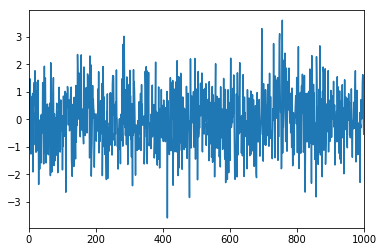

In [46]:
# 随机生成1000个数据
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
 
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

# pandas 数据可以直接观看其可视化形式
data.plot()

plt.show()

就这么简单，熟悉 matplotlib 的朋友知道如果需要 plot 一个数据，我们可以使用 plt.plot(x=, y=)，把x,y的数据作为参数存进去，但是data本来就是一个数据，所以我们可以直接plot。 生成的结果就是上图的样子。

### 8.2、DataFrame 可视化

我们生成一个 1000 * 4 的 DataFrame ，并对他们进行累加

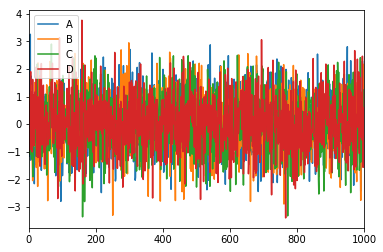

In [47]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
data.cumsum()
data.plot()
plt.show()

这个就是我们刚刚生成的 4 个 column 的数据，因为有 4 组数据，所以4组数据会分别 plot 出来。plot 可以指定很多参数，具体的用法大家可以自己查一下这里

除了 plot ，我经常会用到还有 scatter ，这个会显示散点图，首先给大家说一下在 pandas 中有多少种方法：

 - bar
 - hist
 - box
 - kde
 - area
 - scatter
 - hexbin
 
但是我们今天不会一一介绍，主要说一下 plot 和 scatter 。因为 scatter 只有 x 和 y 两个属性，我们就可以分别给 x 和 y 指定数据

```python
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
```

然后我们在可以再画一个在同一个 ax 上面，选择不一样的数据列，不同的 color 和 label

```python
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()
```
下面展示一下我们 plot 出来的图片。

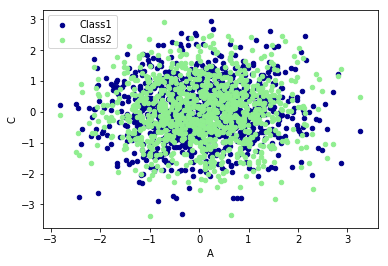

In [48]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()

这就是我们要讲的两种呈现方式，一种是线性的方式，一种是散点图。